In [32]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models\\playground'

In [3]:
os.chdir('../..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01_per_frame.csv
1,features_flip_c_02_120.csv,labels_flip_c_02_per_frame.csv
2,features_flip_c_03_120.csv,labels_flip_c_03_per_frame.csv
3,features_flip_l_01_120.csv,labels_flip_l_01_per_frame.csv
4,features_flip_l_02_120.csv,labels_flip_l_02_per_frame.csv
5,features_flip_p_01_120.csv,labels_flip_p_01_per_frame.csv
6,features_land_c_01_120.csv,labels_land_c_01_per_frame.csv
7,features_land_c_02_120.csv,labels_land_c_02_per_frame.csv
8,features_land_c_03_120.csv,labels_land_c_03_per_frame.csv
9,features_land_l_01_120.csv,labels_land_l_01_per_frame.csv


In [6]:
de.load_data()
de.assemble_data(max_error=500, tolerance_range= 600)
de.display_information()

i: 0 	shape X: (537, 17, 16) 	shape y: (537,) 	count: 55
i: 1 	shape X: (520, 17, 16) 	shape y: (520,) 	count: 37
i: 2 	shape X: (499, 17, 16) 	shape y: (499,) 	count: 59
i: 3 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 135
i: 4 	shape X: (509, 17, 16) 	shape y: (509,) 	count: 95
i: 5 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 88
i: 6 	shape X: (441, 17, 16) 	shape y: (441,) 	count: 83
i: 7 	shape X: (491, 17, 16) 	shape y: (491,) 	count: 70
i: 8 	shape X: (477, 17, 16) 	shape y: (477,) 	count: 74
i: 9 	shape X: (493, 17, 16) 	shape y: (493,) 	count: 112
i: 10 	shape X: (437, 17, 16) 	shape y: (437,) 	count: 63
i: 11 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 86
i: 12 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 57
i: 13 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 150
i: 14 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 115
i: 15 	shape X: (541, 17, 16) 	shape y: (541,) 	count: 0
i: 16 	shape X: (470, 17, 16) 	shape y: (470,) 	count: 77
i: 17 	shape X: (525,

In [27]:
from keras.utils import to_categorical

X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

# only select certain indices to prevent too many 0-labeled instances
idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
zero_idx = np.random.choice(idx[0], 500, replace=False)
keep_idx = np.concatenate([zero_idx,idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")    
    
# print("---------------------------------------------------------------------")
# print("Features:")
# print(de.LabelGenerators[0].feature_names)


print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (10350,)
X: (10350, 17, 16)

Labels before removal of 'no movements'
0 8732
1 242
2 322
3 469
4 0
5 97
6 488

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (2118,)
X: (2118, 17, 16)

Labels after removal of 'no movements'
0 500
1 242
2 322
3 469
4 0
5 97
6 488

---------------------------------------------------------------------
Shapes after transformation:
y: (2118, 7)
X: (2118, 17, 16)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [29]:
n_timesteps = X.shape[1] # here 17
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(        
    X, 
    y, 
    epochs=50, 
    batch_size=16, 
    verbose=1
)

Epoch 1/50
2118/2118 [==============================] - 4s 2ms/step - loss: 1.0842 - acc: 0.5760
Epoch 2/50
2118/2118 [==============================] - 2s 1ms/step - loss: 0.6338 - acc: 0.7573
Epoch 3/50
2118/2118 [==============================] - 2s 1ms/step - loss: 0.5638 - acc: 0.7767
Epoch 4/50
2118/2118 [==============================] - 3s 1ms/step - loss: 0.5152 - acc: 0.8012
Epoch 5/50
2118/2118 [==============================] - 2s 955us/step - loss: 0.5176 - acc: 0.7951
Epoch 6/50
2118/2118 [==============================] - 2s 957us/step - loss: 0.4727 - acc: 0.8149
Epoch 7/50
2118/2118 [==============================] - 2s 1ms/step - loss: 0.4641 - acc: 0.8178A: 
Epoch 8/50
2118/2118 [==============================] - 2s 1ms/step - loss: 0.4545 - acc: 0.8196
Epoch 9/50
2118/2118 [==============================] - 3s 1ms/step - loss: 0.4362 - acc: 0.8258A: 1s - loss: 0.
Epoch 10/50
2118/2118 [==============================] - 2s 1ms/step - loss: 0.4235 - acc: 0.8395
Epoch 

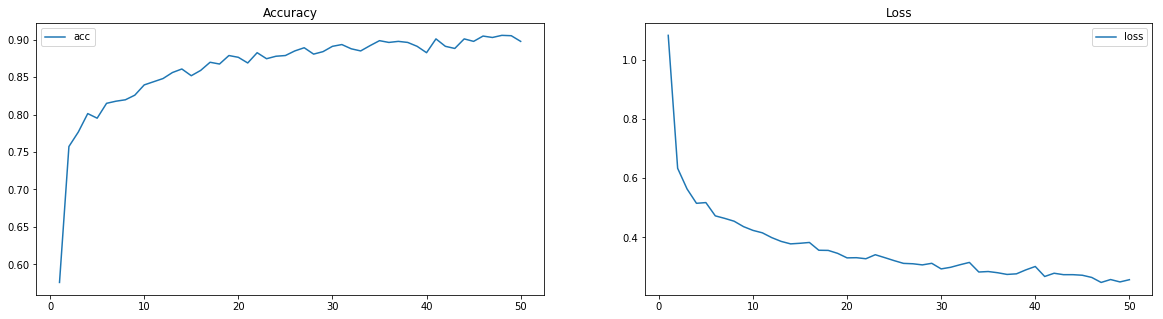

In [33]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [24]:
model.evaluate(
    X,
    y,
    batch_size=16,
    verbose=1
)

1618/1618 [==============================] - 1s 394us/step


[0.04973049906585954, 0.9796044499381953]

In [25]:
model.predict_classes(X[0:1,:,:])[0]
np.nonzero(y[731])[0][0]

6

In [26]:
for i in range(X.shape[0]):
    print("Index:",i,"\tPred:",model.predict_classes(X[i:(i+1),:,:])[0],"\tActual:",np.nonzero(y[i])[0][0])

Index: 0 	Pred: 3 	Actual: 3
Index: 1 	Pred: 3 	Actual: 3
Index: 2 	Pred: 3 	Actual: 3
Index: 3 	Pred: 3 	Actual: 3
Index: 4 	Pred: 3 	Actual: 3
Index: 5 	Pred: 3 	Actual: 3
Index: 6 	Pred: 3 	Actual: 3
Index: 7 	Pred: 3 	Actual: 3
Index: 8 	Pred: 3 	Actual: 3
Index: 9 	Pred: 3 	Actual: 3
Index: 10 	Pred: 3 	Actual: 3
Index: 11 	Pred: 3 	Actual: 3
Index: 12 	Pred: 3 	Actual: 3
Index: 13 	Pred: 3 	Actual: 3
Index: 14 	Pred: 3 	Actual: 3
Index: 15 	Pred: 3 	Actual: 3
Index: 16 	Pred: 3 	Actual: 3
Index: 17 	Pred: 3 	Actual: 3
Index: 18 	Pred: 3 	Actual: 3
Index: 19 	Pred: 3 	Actual: 3
Index: 20 	Pred: 3 	Actual: 3
Index: 21 	Pred: 3 	Actual: 3
Index: 22 	Pred: 3 	Actual: 3
Index: 23 	Pred: 3 	Actual: 3
Index: 24 	Pred: 3 	Actual: 3
Index: 25 	Pred: 3 	Actual: 3
Index: 26 	Pred: 3 	Actual: 3
Index: 27 	Pred: 3 	Actual: 3
Index: 28 	Pred: 3 	Actual: 3
Index: 29 	Pred: 3 	Actual: 3
Index: 30 	Pred: 3 	Actual: 3
Index: 31 	Pred: 3 	Actual: 3
Index: 32 	Pred: 3 	Actual: 3
Index: 33 	Pred: 3 	

Index: 268 	Pred: 3 	Actual: 3
Index: 269 	Pred: 3 	Actual: 3
Index: 270 	Pred: 3 	Actual: 3
Index: 271 	Pred: 3 	Actual: 3
Index: 272 	Pred: 3 	Actual: 3
Index: 273 	Pred: 3 	Actual: 3
Index: 274 	Pred: 3 	Actual: 3
Index: 275 	Pred: 3 	Actual: 3
Index: 276 	Pred: 3 	Actual: 3
Index: 277 	Pred: 3 	Actual: 3
Index: 278 	Pred: 3 	Actual: 3
Index: 279 	Pred: 3 	Actual: 3
Index: 280 	Pred: 3 	Actual: 3
Index: 281 	Pred: 3 	Actual: 3
Index: 282 	Pred: 3 	Actual: 3
Index: 283 	Pred: 3 	Actual: 3
Index: 284 	Pred: 3 	Actual: 3
Index: 285 	Pred: 3 	Actual: 3
Index: 286 	Pred: 3 	Actual: 3
Index: 287 	Pred: 3 	Actual: 3
Index: 288 	Pred: 3 	Actual: 3
Index: 289 	Pred: 3 	Actual: 3
Index: 290 	Pred: 3 	Actual: 3
Index: 291 	Pred: 3 	Actual: 3
Index: 292 	Pred: 3 	Actual: 3
Index: 293 	Pred: 3 	Actual: 3
Index: 294 	Pred: 3 	Actual: 3
Index: 295 	Pred: 3 	Actual: 3
Index: 296 	Pred: 3 	Actual: 3
Index: 297 	Pred: 3 	Actual: 3
Index: 298 	Pred: 3 	Actual: 3
Index: 299 	Pred: 3 	Actual: 3
Index: 3

Index: 552 	Pred: 6 	Actual: 6
Index: 553 	Pred: 6 	Actual: 6
Index: 554 	Pred: 6 	Actual: 6
Index: 555 	Pred: 6 	Actual: 6
Index: 556 	Pred: 6 	Actual: 6
Index: 557 	Pred: 6 	Actual: 6
Index: 558 	Pred: 6 	Actual: 6
Index: 559 	Pred: 6 	Actual: 6
Index: 560 	Pred: 6 	Actual: 6
Index: 561 	Pred: 6 	Actual: 6
Index: 562 	Pred: 6 	Actual: 6
Index: 563 	Pred: 6 	Actual: 6
Index: 564 	Pred: 6 	Actual: 6
Index: 565 	Pred: 6 	Actual: 6
Index: 566 	Pred: 6 	Actual: 6
Index: 567 	Pred: 6 	Actual: 6
Index: 568 	Pred: 6 	Actual: 6
Index: 569 	Pred: 6 	Actual: 6
Index: 570 	Pred: 6 	Actual: 6
Index: 571 	Pred: 6 	Actual: 6
Index: 572 	Pred: 6 	Actual: 6
Index: 573 	Pred: 6 	Actual: 6
Index: 574 	Pred: 6 	Actual: 6
Index: 575 	Pred: 6 	Actual: 6
Index: 576 	Pred: 6 	Actual: 6
Index: 577 	Pred: 6 	Actual: 6
Index: 578 	Pred: 6 	Actual: 6
Index: 579 	Pred: 6 	Actual: 6
Index: 580 	Pred: 6 	Actual: 6
Index: 581 	Pred: 6 	Actual: 6
Index: 582 	Pred: 6 	Actual: 6
Index: 583 	Pred: 6 	Actual: 6
Index: 5

Index: 839 	Pred: 6 	Actual: 6
Index: 840 	Pred: 6 	Actual: 6
Index: 841 	Pred: 6 	Actual: 6
Index: 842 	Pred: 6 	Actual: 6
Index: 843 	Pred: 6 	Actual: 6
Index: 844 	Pred: 6 	Actual: 6
Index: 845 	Pred: 6 	Actual: 6
Index: 846 	Pred: 6 	Actual: 6
Index: 847 	Pred: 6 	Actual: 6
Index: 848 	Pred: 6 	Actual: 6
Index: 849 	Pred: 6 	Actual: 6
Index: 850 	Pred: 6 	Actual: 6
Index: 851 	Pred: 6 	Actual: 6
Index: 852 	Pred: 6 	Actual: 6
Index: 853 	Pred: 6 	Actual: 6
Index: 854 	Pred: 6 	Actual: 6
Index: 855 	Pred: 6 	Actual: 6
Index: 856 	Pred: 6 	Actual: 6
Index: 857 	Pred: 6 	Actual: 6
Index: 858 	Pred: 6 	Actual: 6
Index: 859 	Pred: 6 	Actual: 6
Index: 860 	Pred: 6 	Actual: 6
Index: 861 	Pred: 6 	Actual: 6
Index: 862 	Pred: 6 	Actual: 6
Index: 863 	Pred: 6 	Actual: 6
Index: 864 	Pred: 6 	Actual: 6
Index: 865 	Pred: 6 	Actual: 6
Index: 866 	Pred: 6 	Actual: 6
Index: 867 	Pred: 6 	Actual: 6
Index: 868 	Pred: 6 	Actual: 6
Index: 869 	Pred: 6 	Actual: 6
Index: 870 	Pred: 6 	Actual: 6
Index: 8

Index: 1134 	Pred: 2 	Actual: 2
Index: 1135 	Pred: 2 	Actual: 2
Index: 1136 	Pred: 2 	Actual: 2
Index: 1137 	Pred: 2 	Actual: 2
Index: 1138 	Pred: 2 	Actual: 2
Index: 1139 	Pred: 2 	Actual: 2
Index: 1140 	Pred: 2 	Actual: 2
Index: 1141 	Pred: 2 	Actual: 2
Index: 1142 	Pred: 2 	Actual: 2
Index: 1143 	Pred: 2 	Actual: 2
Index: 1144 	Pred: 2 	Actual: 2
Index: 1145 	Pred: 2 	Actual: 2
Index: 1146 	Pred: 2 	Actual: 2
Index: 1147 	Pred: 2 	Actual: 2
Index: 1148 	Pred: 2 	Actual: 2
Index: 1149 	Pred: 2 	Actual: 2
Index: 1150 	Pred: 2 	Actual: 2
Index: 1151 	Pred: 2 	Actual: 2
Index: 1152 	Pred: 2 	Actual: 2
Index: 1153 	Pred: 2 	Actual: 2
Index: 1154 	Pred: 2 	Actual: 2
Index: 1155 	Pred: 2 	Actual: 2
Index: 1156 	Pred: 2 	Actual: 2
Index: 1157 	Pred: 2 	Actual: 2
Index: 1158 	Pred: 2 	Actual: 2
Index: 1159 	Pred: 2 	Actual: 2
Index: 1160 	Pred: 2 	Actual: 2
Index: 1161 	Pred: 2 	Actual: 2
Index: 1162 	Pred: 2 	Actual: 2
Index: 1163 	Pred: 2 	Actual: 2
Index: 1164 	Pred: 2 	Actual: 2
Index: 1

Index: 1399 	Pred: 1 	Actual: 1
Index: 1400 	Pred: 1 	Actual: 1
Index: 1401 	Pred: 1 	Actual: 1
Index: 1402 	Pred: 1 	Actual: 1
Index: 1403 	Pred: 1 	Actual: 1
Index: 1404 	Pred: 1 	Actual: 1
Index: 1405 	Pred: 1 	Actual: 1
Index: 1406 	Pred: 1 	Actual: 1
Index: 1407 	Pred: 5 	Actual: 1
Index: 1408 	Pred: 5 	Actual: 1
Index: 1409 	Pred: 1 	Actual: 1
Index: 1410 	Pred: 1 	Actual: 1
Index: 1411 	Pred: 1 	Actual: 1
Index: 1412 	Pred: 1 	Actual: 1
Index: 1413 	Pred: 1 	Actual: 1
Index: 1414 	Pred: 1 	Actual: 1
Index: 1415 	Pred: 1 	Actual: 1
Index: 1416 	Pred: 1 	Actual: 1
Index: 1417 	Pred: 1 	Actual: 1
Index: 1418 	Pred: 1 	Actual: 1
Index: 1419 	Pred: 1 	Actual: 1
Index: 1420 	Pred: 1 	Actual: 1
Index: 1421 	Pred: 1 	Actual: 1
Index: 1422 	Pred: 1 	Actual: 1
Index: 1423 	Pred: 1 	Actual: 1
Index: 1424 	Pred: 1 	Actual: 1
Index: 1425 	Pred: 1 	Actual: 1
Index: 1426 	Pred: 1 	Actual: 1
Index: 1427 	Pred: 1 	Actual: 1
Index: 1428 	Pred: 1 	Actual: 1
Index: 1429 	Pred: 1 	Actual: 1
Index: 1